# Cansu Ayten - 171180010

## **Importing Libraries**

In [1]:
import numpy as np
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras import regularizers


from keras import backend as K
from keras.layers.core import Lambda
from keras.metrics import binary_crossentropy

## **Importing Dataset** #
MNIST dataset was used in the assignment. The MNIST dataset consists of handwritten digits. The training set has 60000 examples and the test set has 10000 examples.
The dataset is available in the tensorflow library. Therefore, it can be easily imported.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## **Shape**

In [3]:
#Here it is seen that there are 60000 examples in the train dataset and 10000 examples in the test dataset.
#Images are 28x28 pixels.
print("x_train shape: ",x_train.shape)
print("x_test shape:  ",y_train.shape) 
print("y_train shape: ",x_test.shape)
print("y_train shape: ",y_test.shape) 

x_train shape:  (60000, 28, 28)
x_test shape:   (60000,)
y_train shape:  (10000, 28, 28)
y_train shape:  (10000,)


## **Visualization**

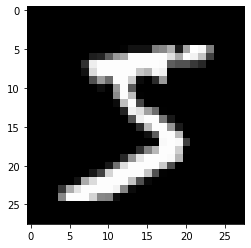

In [4]:
# Visualization of an sample
# First image
plt.imshow(x_train[0].reshape(28,28)) 
plt.gray()

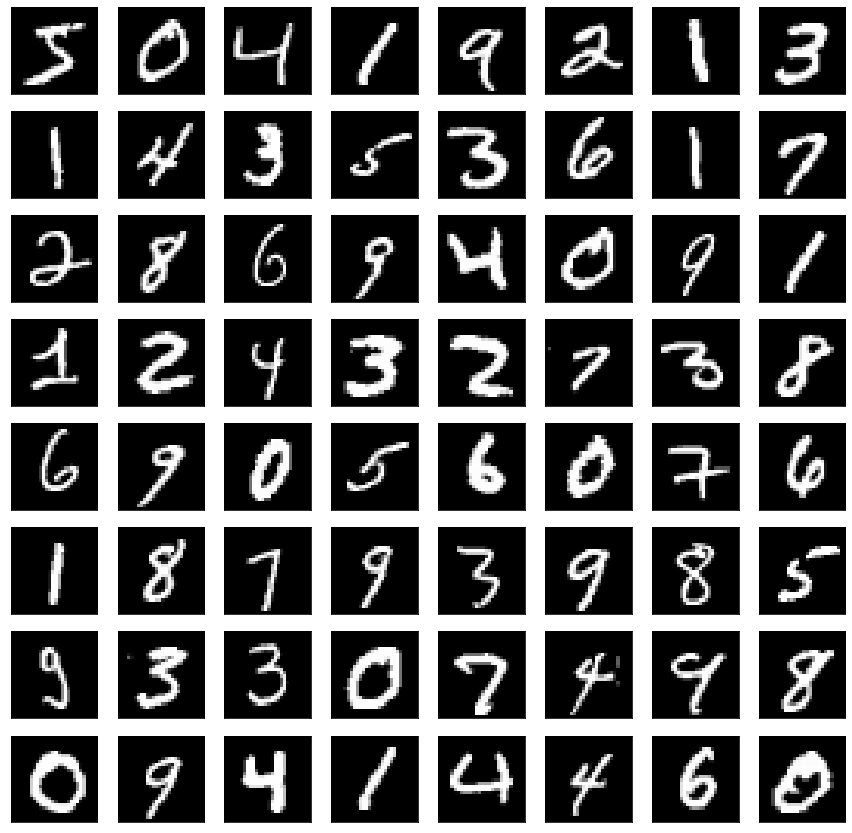

In [5]:
plt.figure(figsize=(15, 15))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(x_train[i].reshape(28,28)) 
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Preprocessing**

In [6]:
# Normalization
# We have to go through some processes to prepare the data.
# Therefore, the pixel values of the images should be scaled.
# Pixel values are integers between 0 and 255.
# Pixel values are divided by 255. Thus, the values are rescaled in the [0,1] range.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
# Flatten
# We changed the shape of the dataset to use it as an input. 28x28=784
# This is because we work with Dense.
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test  = x_test.reshape(x_test.shape[0], 28*28)

In [8]:
# New shapes
print("x_train shape: ",x_train.shape)
print("x_test shape:  ",y_train.shape) 
print("y_train shape: ",x_test.shape)
print("y_train shape: ",y_test.shape) 

x_train shape:  (60000, 784)
x_test shape:   (60000,)
y_train shape:  (10000, 784)
y_train shape:  (10000,)


# Homework
4 types of autoencoders were implemented in this assignment.
1. Compression Autoencoder
2. Denoising Autoencoder
3. Sparse Autoencoder
4. Variational Autoencoder

Autoencoder structure in compression is used in denoising and sparse autoencoder.

----------

# Autoencoder

- Autoencoders are unsupervised neural networks.
- They take the data and compress it. Then they rebuild. While doing this, they try to do it with as little loss as possible.
- Loss is the difference between input and output.
- Forces important features in input data to be hidden in latent space. This condition is called bottleneck.
- Autoencoders take data and pass it through several layers. Meanwhile, they try to understand the data.
- As a result, they try to reconstruct the data.
- Autoencoders consist of three components. These are:
    1. Encoder
    2. Code
    3. Decoder


- The input is compressed in the encoder. Images are compressed and represented at a smaller size.
- In the code section, a small compressed representation given as input to the decoder is displayed. (Bottleneck)
- Uses the data taken from the code part in the decoder as input. This input data is the output of the code part.
- Decoder part converts the imported inputs to their original size. The new images created are reconstructed versions of the input images.
- Therefore, it can be said that the new images are lossy reconstructed versions of the original images.
- The MSE function was used in the assignment for the loss between the original image and the reconstructed image.
- From this it can be concluded that autoencoders do lossy compression.
- They try to compress the data with the least loss. But this loss can never be zero.

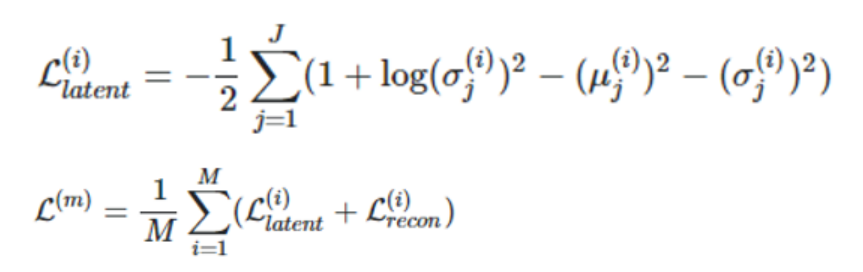
Figure 1 : Latent Loss and Vae Loss 
,source: https://cihanongun.medium.com/variational-autoencoder-vae-nedir-autoencoderdan-ne-fark%C4%B1-vard%C4%B1r-c3f44f6f25c8

In [9]:
class Ae:
    def __init__(self, input_size = 784, hidden_size = 128 , coding_size = 32, mean=0, var=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.coding_size = coding_size
        self.mean = mean
        self.var=var
        self.z_mean=None
        self.z_log_var=None

    # Compression Autoencoder
    # In CompressionAe code, x=input layer, hidden1 and hidden2 = hidden layer, c = coding layer (or latent layer) and output = output layer.
    # input_size=784, hidden_size=128, coding_size=32
    # 784 (28x28) value is given to the input layer, ie x. This is because of the shape of the images.
    # hidden1 and hidden2 consist of Dense layers containing 128 nodes.
    # In c, which is the coding representation, images are compressed to a value of 32. Then these compressed images will be given to the decoder.
    # Since the image is compressed in the encoder part, a small compressed representation is created.
    # Compressed images that are the output of c in hidden2 layer are taken as input.
    # Since there is now a decoder section, the number of units must increase in order to obtain the original data.
    # Therefore, the decoder works as the opposite of the encoder part. Enlarges images.
    # output consists of Dense layer containing 784 nodes.
    # In this code I used the Adam optimization method with a learning rate of 0.01.
    # For the reconstruction loss, I used the mean squared error (MSE) between the network output and the network input.
    # The plt_figure function is used to visualize it.

    def CompressionAe(self,epoch,x_test):
        x = Input(shape=(self.input_size,))
        hidden1 = Dense(self.hidden_size,activation='sigmoid')(x)
        c = Dense(self.coding_size, activation='sigmoid')(hidden1)
        hidden2 = Dense(self.hidden_size, activation='sigmoid')(c)
        output = Dense(self.input_size, activation='sigmoid')(hidden2)
        
        ae = Model(x, output)
        ae.summary()
        ae.compile(optimizer=keras.optimizers.Adam(0.01), loss='mse')
        ae.fit(x_train,x_train,
                           batch_size=128,
                           epochs = epoch,
                           verbose=1,
                           validation_data = (x_test, x_test))
        images = ae.predict(x_test)
        self.plt_figure(x_test,images)


    
    # Denoising Autoencoder
    # Here, random noise is added to the images taken from the MNIST dataset.
    # Gaussian Noise method is used while adding random noise.
    # Input are noisy images.
    # Output should be noise-free images.
    # While obtaining noise-free data from noisy data, images are represented in small compressed size using encoder.
    # In the decoder part, noise-free images are obtained from the compressed images.
    # These two parts are similar with the autoencoder structure.

    # DenoisingAe
    # The difference from classic autoencoders is that it works with noisy data.
    # Therefore the same structure as in CompressionAe is used. (optimizer, loss func, activation function, input_size, hidden_size, coding_size etc)
    # Noisy data is given as input.
    # GaussianNoise function is used when obtaining noisy data.
    # The goal here is to get almost original data without noise. 

    # Training data = noisy_x_train
    # Target data = x_train
    # Validation data = (noisy_x_test, x_test)

    # GaussianNoise
    # The mean and standard deviation values are used for noise.
    # Standard deviation (sigma) = square root of variance
    # The mean value is 0 and the variance is 0.1.
    # In order to obtain the standard deviation, the square root of the variance, ie 0.1, is taken.
    # A noise is obtained by using the standard deviation and mean values. 
    # The amount of noise is determined by standard deviation.
    # The dimensions of this noise are the same as the dimensions of the image.
    # The noise created is combined with the original image, resulting in a noisy image.


    def GaussianNoise(self,image):
        sigma = self.var**0.5
        noise = np.random.normal(self.mean,sigma,image.shape)
        noisy_image = image + noise
        return noisy_image
    
    def DenoisingAe(self,epoch,x_train,x_test):
        noisy_x_train=self.GaussianNoise(x_train)
        noisy_x_test=self.GaussianNoise(x_test)
        
        x = Input(shape=(self.input_size,))
        hidden1 = Dense(self.hidden_size,activation='sigmoid')(x)
        c = Dense(self.coding_size, activation='sigmoid')(hidden1)
        hidden2 = Dense(self.hidden_size, activation='sigmoid')(c)
        output = Dense(self.input_size, activation='sigmoid')(hidden2)
        
        ae = Model(x, output)
        ae.summary()
        ae.compile(optimizer=keras.optimizers.Adam(0.01), loss='mse')
        ae.fit(noisy_x_train,x_train,
                           batch_size=128,
                           epochs = epoch,
                           verbose=1,
                           validation_data = (noisy_x_test, x_test))
        images = ae.predict(noisy_x_test)
        
        # code for visualization of original images, noisy images and output images
        plt.figure(figsize=(30, 15))
        for i in range(5):
            # display original 
            ax = plt.subplot(3, 5, i + 1)
            #2 row, n column, i+1. plot
            plt.imshow(x_test[i].reshape(28, 28))
            plt.gray()
            plt.title("Original")
            
            ax = plt.subplot(3, 5, i + 1 + 5)
            #2 row, n column, i+1. plot
            plt.imshow(noisy_x_test[i].reshape(28, 28))
            plt.gray()
            plt.title("Noisy")
            
            # display output
            ax = plt.subplot(3, 5, i + 1 + 10)
            #2 row, n column, i+1+n. plot
            plt.imshow(images[i].reshape(28, 28))
            plt.gray()
            plt.title("Output")
            

        plt.show()
        
    # Sparse Autoencoder
    # Autoencoders try to encode important information and discard unimportant information.
    # Encoders compress images.
    # Decoders try to create the original image with the encoded image compressed.
    # This is how it works in Sparse Autoencoder. For this reason, the structure written for the Compression Autoencoder is used.
    # But the difference from Compression Autoencoder is the sparsity value.
    # Bottleneck is tried to be created by activating fewer neurons, that is, with sparsity.
    # It achieves this by using the regulizer in the code.
    # Activity_regularizer is added to the Bottleneck layer, that is, the coding layer.
    # Thus, activation functions are penalized and some neurons are disabled.
    # The sparse operation is done. Except for those that have been deactivated, what is left becomes important.   

    # SparseAe
    # Its structure is similar to classical autoencoders.
    # Therefore the same structure as in CompressionAe is used.(optimizer, loss func, activation function, input_size, hidden_size, coding_size etc)
    # As mentioned, the difference is that activity_regularizer is added to the coding layer (c). L2 is used in this part.
    # Sparsity value is 0.01 as given.
    # The activity_regulizer regularization process added to the coding layer is done.
    # Some neurons are deactivated. Sparseness is ensured.

    def SparseAe(self):
        x = Input(shape=(self.input_size,))
        hidden1 = Dense(self.hidden_size,activation='sigmoid')(x)
        c = Dense(self.coding_size, activation='sigmoid',activity_regularizer=regularizers.L2(10e-3))(hidden1)
        hidden2 = Dense(self.hidden_size, activation='sigmoid')(c)
        output = Dense(self.input_size, activation='sigmoid')(hidden2)
        
        ae = Model(x, output)
        ae.summary()
        ae.compile(optimizer=keras.optimizers.Adam(0.01), loss='mse')
        ae.fit(x_train,x_train,
                           batch_size=128,
                           epochs = 20,
                           verbose=1,
                           validation_data = (x_test, x_test))
        images = ae.predict(x_test)
        self.plt_figure(x_test,images)
        
        
    # Variational Encoder
    # Converts the vector in the input layer to 2 parameters for the hidden layer: mean, standard deviation
    # While the input is compressed in classical autoencoders, mean and standard deviation are obtained from the input in variational encoders.
    # The mean and standard deviation values are deterministic.
    # New samples are produced using these values. (z)
    # Produced samples are probabilistic. (Random)
    # These new samples produced prevent the weight values from being updated in back propagation.
    # Because the mean and standard deviation values are not suitable for back propagation.
    # Reparametrization trick is used to solve this problem.
    # In the Reparametrization trick, the epsilon(e) produced by taking mean=0, standard deviation=1 is used. It is produced from the normal distribution.
    # Epsilon is a random number. Also called random noise.
    # Back propagation becomes available with epsilon.
    # Thus, z can be produced by using the mean and standard deviation values.
    # The epsilon is kept constant during backpropagation.
    # In short, back propagation is possible with the reparametrization trick.
    
    # Classic autoencoders use reconstruction loss. This loss is the difference between input and output.
    # Binary cross entropy is used for this part of the assignment.
    # Variational encoders also use Kullback–Leibler (KL) Divergence. It is called regularization (latent) loss.
    # Using KL-Divergence, the difference between the normal distribution and the distribution formed by the mean and variance values is Decalculated.
    # In other words, it finds how different the two distributions are from each other.
    # When calculating, values of 0 for the mean and 1 for the standard deviation are used.
    # Finally, loss is the sum of reconstruction loss and KL-Divergence.
        
    # VariationalAe
    # The input layer and the first and second hidden layers are used as they are used in compression ae.
    # The different part is the loss function and the coding layer.
    # Denses are created for z_mean and z_log_var in coding, ie bottleneck.
    # Here, the unit number is 32 (coding_size).
    # Then Lambda layer is used for z production.
    # Optional expressions can be used with the lambda layer. It is similar to the lambda function but returns a layer.
    # Its parameters are output_shape and sampling function.
    # Output shape that given in the assignment is 32 for the coding layer. (coding_size)
    # Here, the sampling process is started by going to the sampling function.
    # While sampling, mean 0 and standard deviation 1 were accepted as explained in the Sampling section.
    
    # Sampling
    # In this function, z_mean and z_log_var values are taken.
    # A random vector is sampled in the distribution determined using these parameters.
    # Since the mean is 0 and the standard deviation is 1, sampling is done from a normal distribution around 0-1.
    # exp(log(sigma)^2 / 2) = exp(log(σ)) = σ
    # Sampling ---> z= mean+standard deviation(σ) * epsilon
   
    # vloss
    # bce_loss is binary cross entropy loss.
    # kl_loss Indicates KL-Divergence. Figure 1 was used while writing the kl_loss part.
    # bce_loss and kl_loss are added and averaged.
    # The result is returned and used as loss.
    
    
    def VariationalAe(self):
        x = Input(shape=(self.input_size,))
        hidden1 = Dense(self.hidden_size,activation='sigmoid')(x)
        self.z_mean = Dense(self.coding_size)(hidden1)
        self.z_log_var = Dense(self.coding_size)(hidden1)
        
        
        z = Lambda(self.sampling, output_shape=(self.coding_size,))([self.z_mean, self.z_log_var])
        
        hidden2 = Dense(self.hidden_size,activation='sigmoid')(z)
        output_mean=Dense(self.input_size,activation='sigmoid')(hidden2)
        
        ae = Model(x, output_mean)
        ae.summary()
        ae.compile(optimizer=keras.optimizers.Adam(0.01), loss=self.vloss)
        ae.fit(x_train,x_train,
                           batch_size=128,
                           epochs = 20,
                           verbose=1,
                           validation_data = (x_test, x_test))
        images = ae.predict(x_test)
        self.plt_figure(x_test,images)
                            
    def sampling(self,mean_var):
        self.z_mean, self.z_log_var = mean_var
        shape1=(K.shape(self.z_mean)[0], self.coding_size)
        epsilon = K.random_normal(shape=shape1, mean=0., stddev=1)
        z=self.z_mean + K.exp(self.z_log_var / 2) * epsilon
        return z
    
    def vloss(self,x, output_mean):
        bce_loss = self.input_size * binary_crossentropy(x, output_mean)
        kl_loss = K.sum(1 + self.z_log_var - K.square(self.z_mean) - K.exp(self.z_log_var), axis=-1)  
        kl_loss *= -0.5
        vloss=K.mean(bce_loss + kl_loss)
        return vloss
    
    
    # With this function, visualization of images is done. It is set to be 2 rows and n images (columns).
    # Since 5 is requested in the assignment, the number of images to be visualized is set to 5.
    def plt_figure(self,x_test,images):
        plt.figure(figsize=(30, 15))
        for i in range(5):
            # display original
            ax = plt.subplot(2, 5, i + 1)
            #2 row, n column, i+1. plot
            plt.imshow(x_test[i].reshape(28, 28))
            plt.gray()
            plt.title("Original")
        
            # display output
            ax = plt.subplot(2, 5, i + 1 + 5)
            #2 row, n column, i+1+n. plot
            plt.imshow(images[i].reshape(28, 28))
            plt.gray()
            plt.title("Output")

        plt.show()

In [10]:
ae=Ae()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s

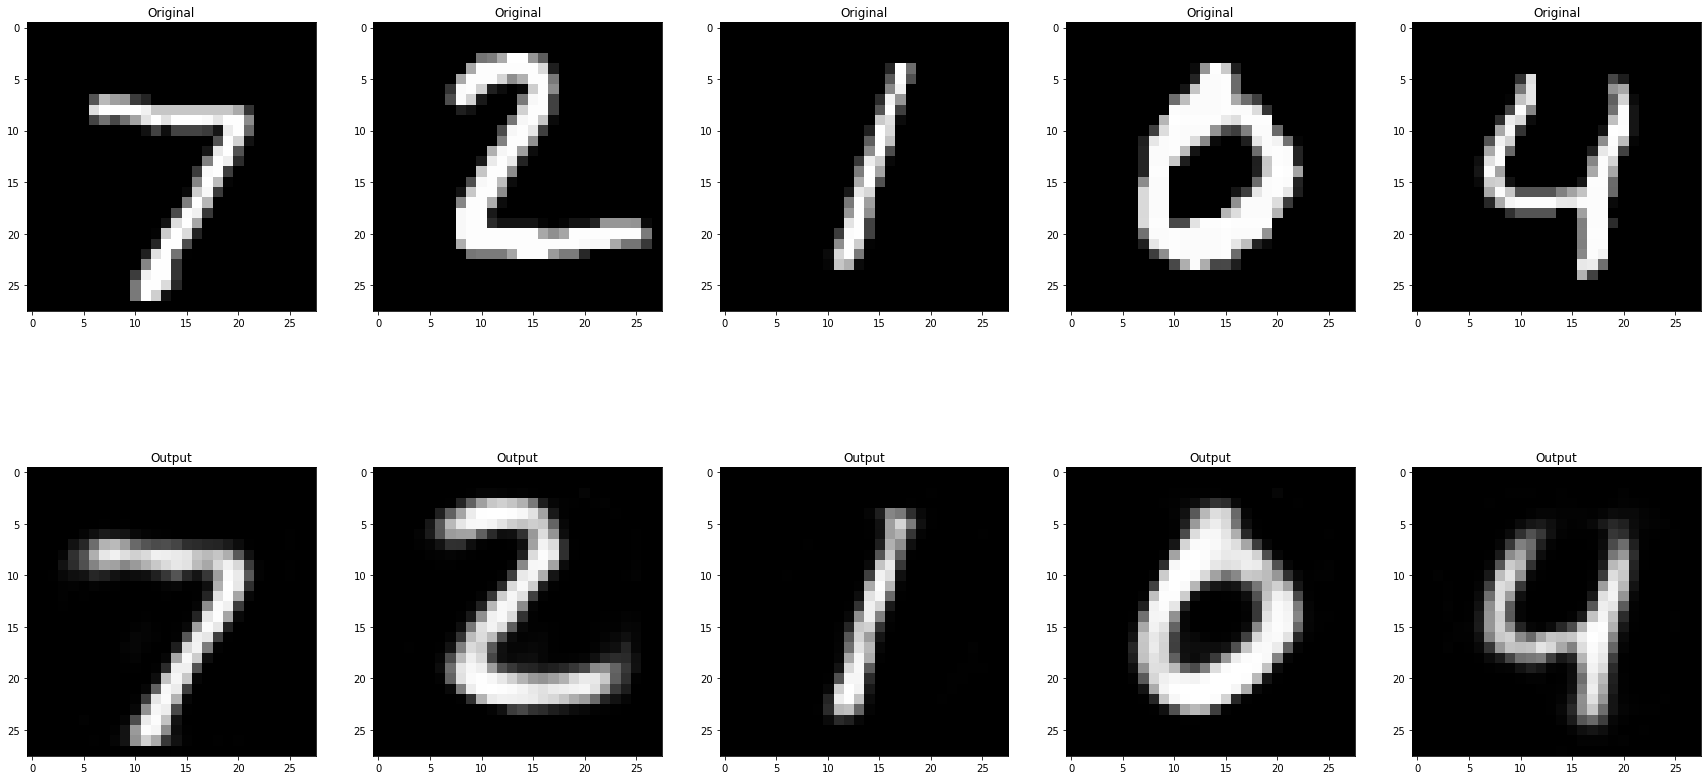

In [11]:
ae.CompressionAe(5,x_test)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 dense_7 (Dense)             (None, 784)               101136    
                                                                 
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] -

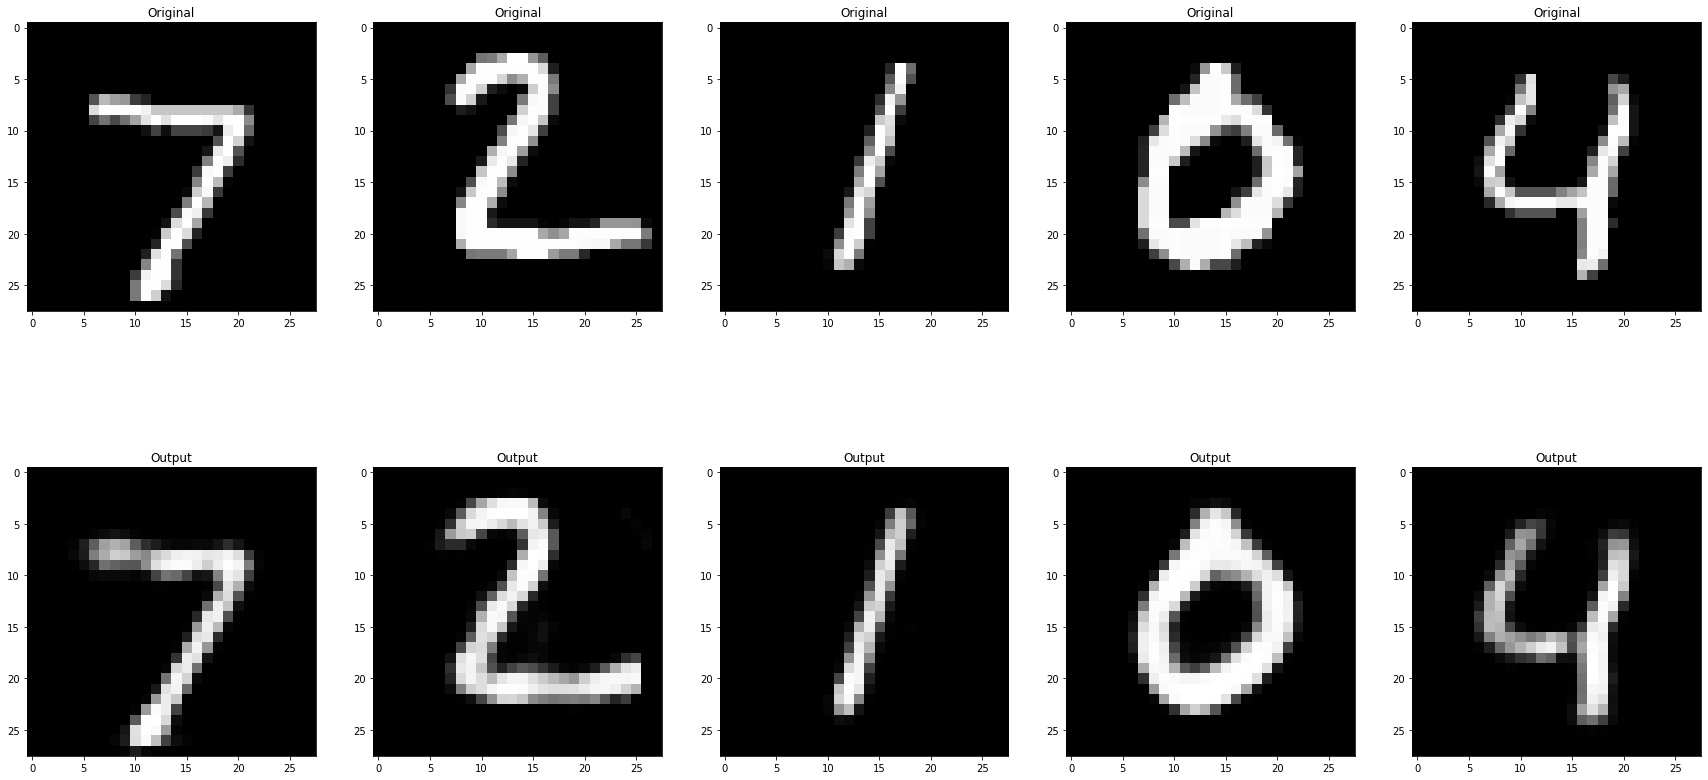

In [12]:
ae.CompressionAe(20,x_test)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 128)               4224      
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 

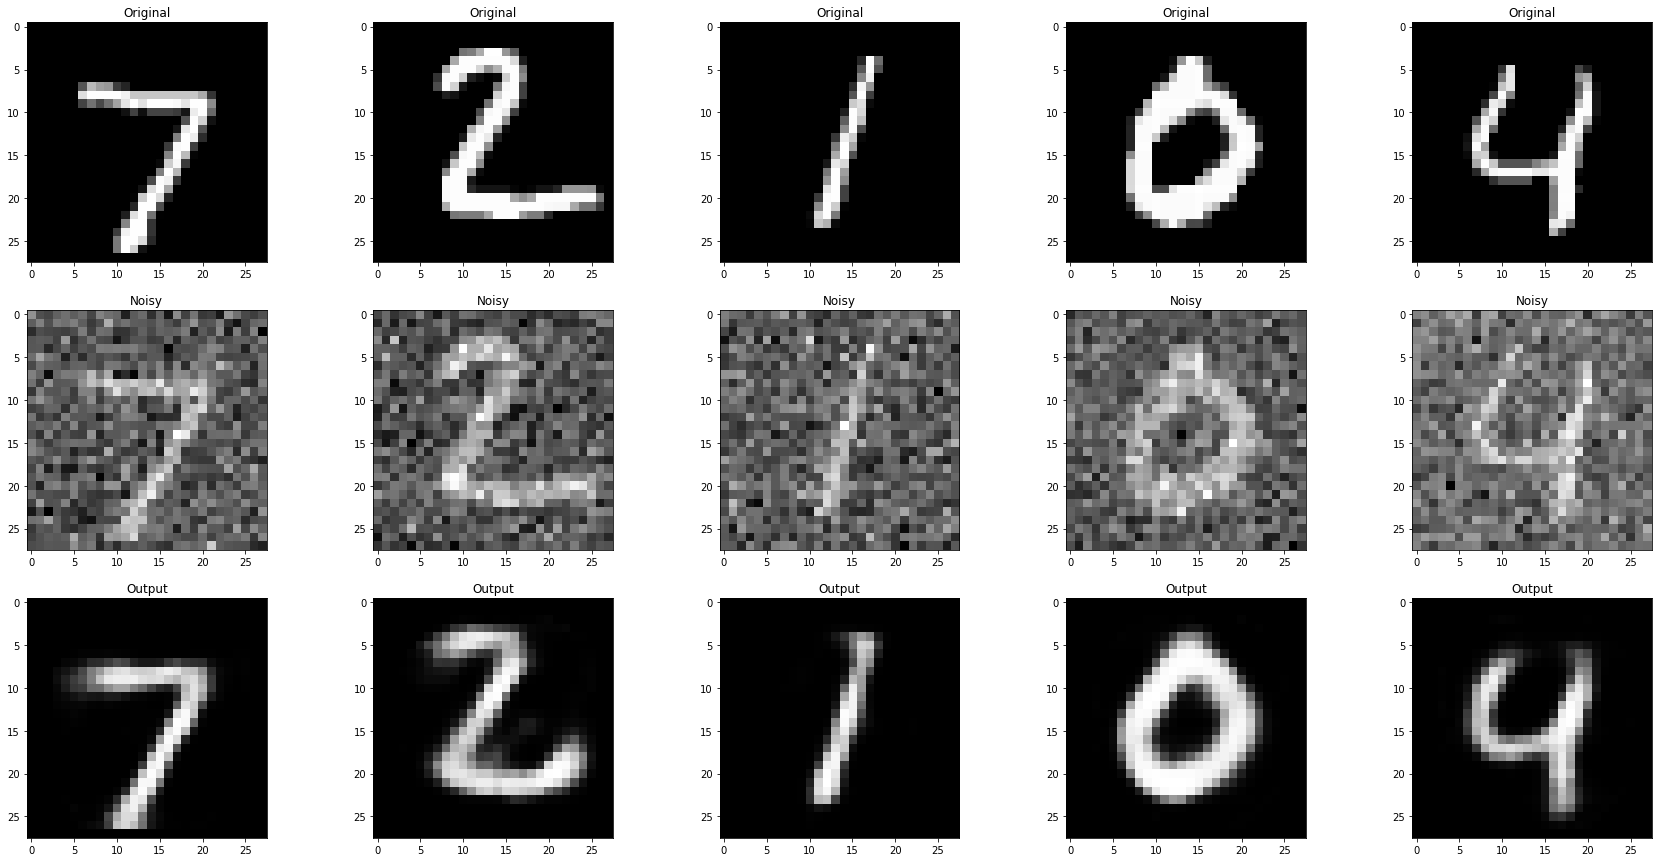

In [13]:
ae.DenoisingAe(5,x_train, x_test)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 32)                4128      
                                                                 
 dense_14 (Dense)            (None, 128)               4224      
                                                                 
 dense_15 (Dense)            (None, 784)               101136    
                                                                 
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] -

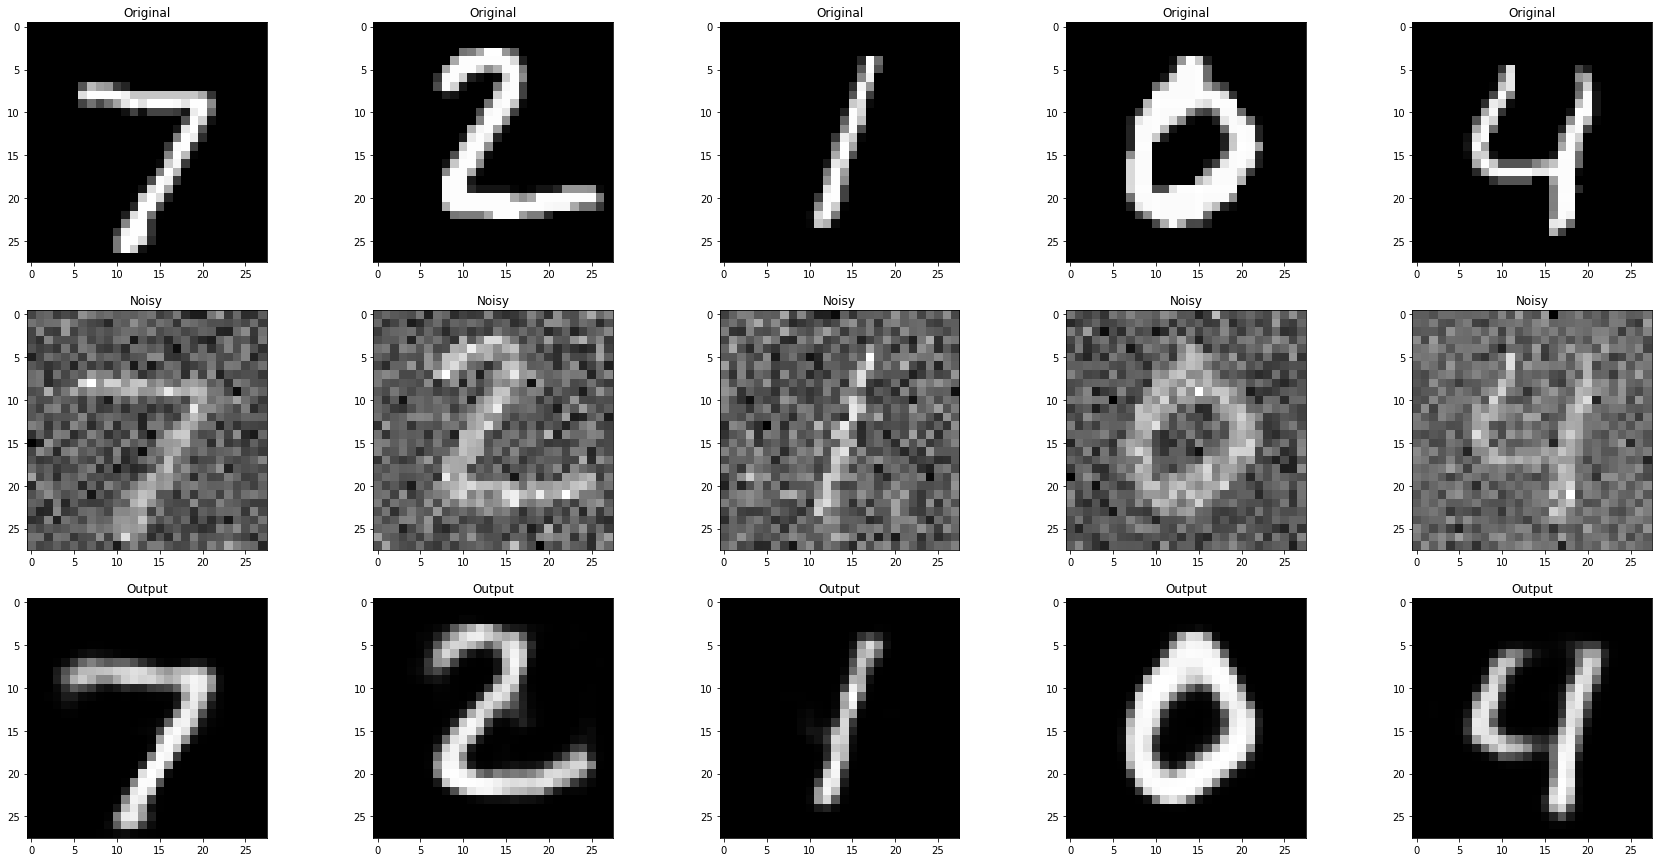

In [14]:
ae.DenoisingAe(20,x_train, x_test)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 32)                4128      
                                                                 
 dense_18 (Dense)            (None, 128)               4224      
                                                                 
 dense_19 (Dense)            (None, 784)               101136    
                                                                 
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] -

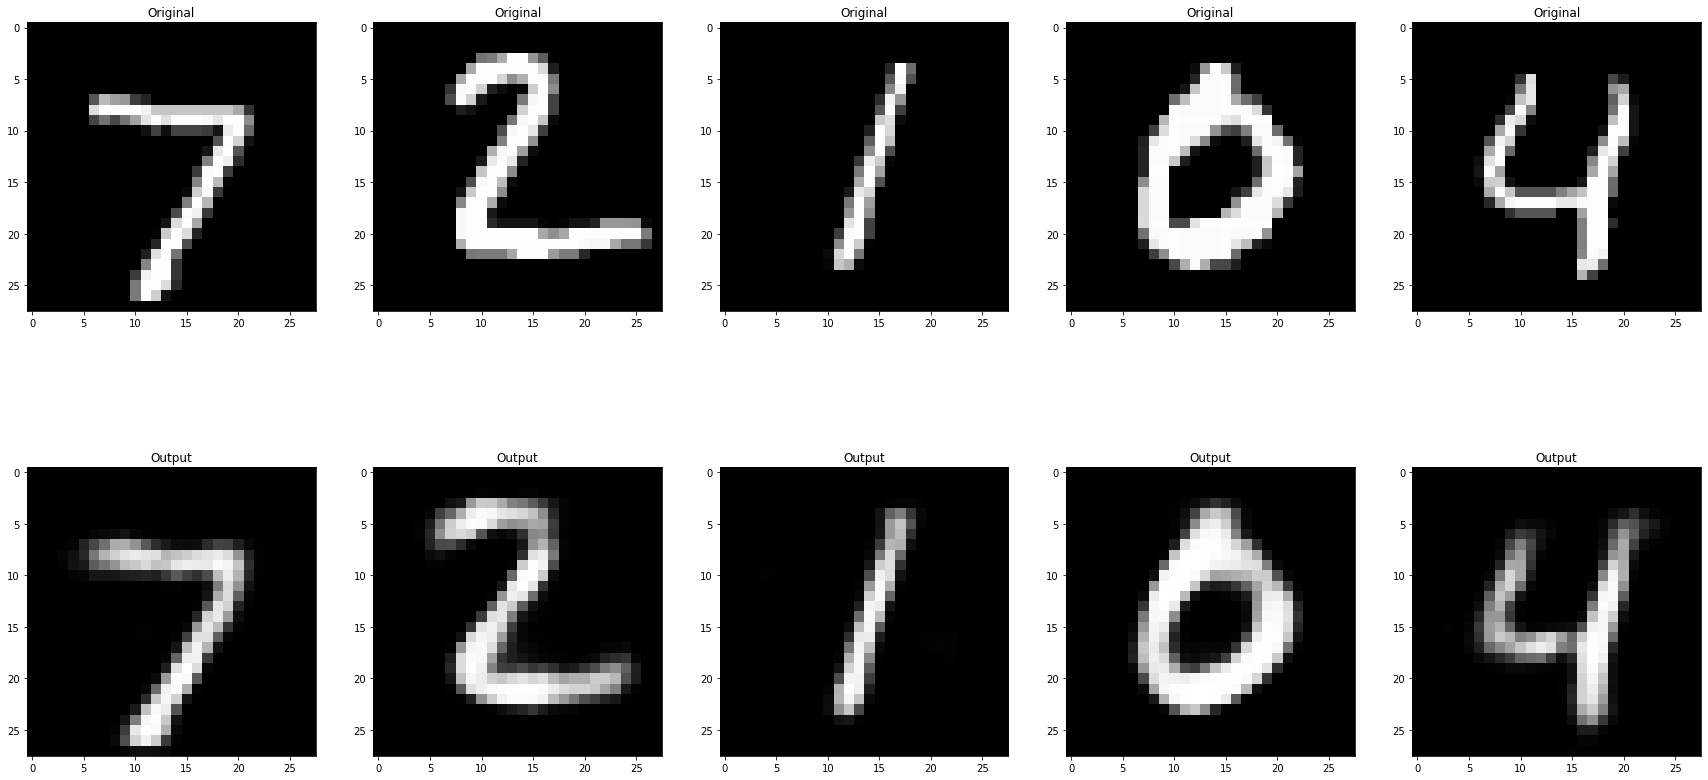

In [15]:
ae.SparseAe()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_20 (Dense)               (None, 128)          100480      ['input_6[0][0]']                
                                                                                                  
 dense_21 (Dense)               (None, 32)           4128        ['dense_20[0][0]']               
                                                                                                  
 dense_22 (Dense)               (None, 32)           4128        ['dense_20[0][0]']               
                                                                                            

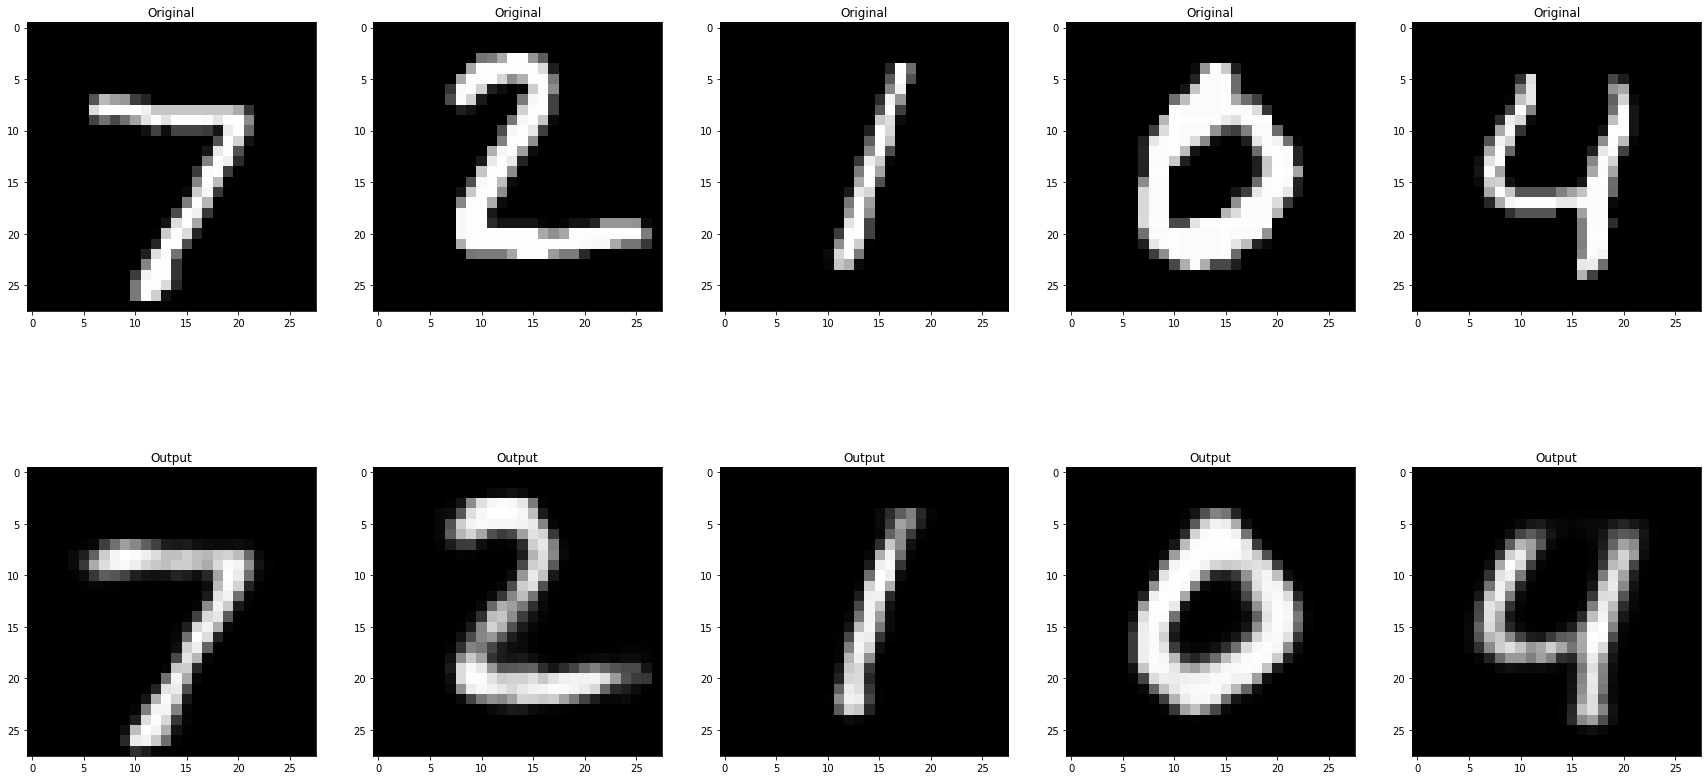

In [16]:
ae.VariationalAe()